 #                   <span style="color:Black">Cyclistic bike-share analysis case study.</span>  

###   <span style="color:orange">CONTEXT</span>

### <span style="Color:Black">The bike sharing company wants to analyze their user data to find the main differences in behaviour between their two types of users,the “casual” who pays for each ride and the annual member who pays a yearly subscription to the service.</span>

### <span style="color:orange">CONTENT</span>

This dataset contains information of 555700+ users of bike-share company with different features like their start_location, end_location,bike_used,member_casual and many other features

## <span style=color:orange>Business Task</span>

The business task is defined as searching for differences in the two identified kinds of users in order to make a focused marketing campaign to the “casual” users in order for them to change to the annual subscription

### <span color:Black>What could motivate the “casual” users to change to an annual subscription based on their behavior?</span>

## Loading Data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
from IPython.display import Image


In [2]:
data=pd.read_csv("Master2.csv")
df=pd.DataFrame(data,columns=['ride_id','rideable_type','started_at','ended_at','start_station_name','start_station_id','end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lng','member_casual','Ride_length','weekdays'])
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_length,weekdays
0,C2F7DD78E82EC875,electric_bike,44574.49985,44574.50190,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0.002049,5
1,A6CF8980A652D272,electric_bike,44571.36245,44571.36547,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0.003021,2
2,BD0F91DFF741C66D,classic_bike,44586.20394,44586.20696,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0.003021,3
3,CBB80ED419105406,classic_bike,44565.01255,44565.02292,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0.010370,3
4,DDC963BFDDA51EEA,classic_bike,44581.06331,44581.06750,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0.004190,5


In [31]:
df['start_station_name'].value_counts()

Kingsbury St & Kinzie St                        4315
Streeter Dr & Grand Ave                         3757
University Ave & 57th St                        3595
Ellis Ave & 60th St                             3581
Clark St & Elm St                               3453
                                                ... 
Tripp Ave & 15th St                                1
Pawel Bialowas - Test- PBSC charging station       1
Seeley Ave & Garfield Blvd                         1
Troy Ave & 27th St                                 1
Carpenter St & 63rd St                             1
Name: start_station_name, Length: 847, dtype: int64

## Converting week(numeric_values)into days

In [17]:
df['Days']=df['weekdays']
df['Days'].replace([1,2,3,4,5,6,7] ,['Sun','mon','Tue','Wed','Thu','Fri','Sat'],inplace=True)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_length,weekdays,Days
0,C2F7DD78E82EC875,electric_bike,44574.49985,44574.50190,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0.002049,5,Thu
1,A6CF8980A652D272,electric_bike,44571.36245,44571.36547,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0.003021,2,mon
2,BD0F91DFF741C66D,classic_bike,44586.20394,44586.20696,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0.003021,3,Tue
3,CBB80ED419105406,classic_bike,44565.01255,44565.02292,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0.010370,3,Tue
4,DDC963BFDDA51EEA,classic_bike,44581.06331,44581.06750,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0.004190,5,Thu


## <span style=color:Black>Checking duplicate rows and null values</span>

In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    82086
start_station_id      82086
end_station_name      89439
end_station_id        89439
start_lat                 0
start_lng                 0
end_lat                 429
end_lng                 429
member_casual             0
Ride_length               0
weekdays                  0
dtype: int64

There are null values in start_staion_name,start_station_id,end_station_name,end_station_id and end_lat_lng,Its seems like data was not completely provided by the user of bike-sharing company.In statistics, null values generally fall into one of two categories: values that are missing at random, and those values that are not missing at random.<span style=color:red>In this dataset we have second type of null values and the null values are not completely missing,some use full information are provide by the user,if we drop all the null values this may affect the final results</span>.We have data more than 555700+ of users so we can go forward with considering null values which will not affect the final result of analysis. 

## Shape of Dataset

In [19]:
df.shape

(503421, 15)

## Columns present in dataset


In [20]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Ride_length', 'weekdays'],
      dtype='object')

## information of dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503421 entries, 0 to 503420
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             503421 non-null  object 
 1   rideable_type       503421 non-null  object 
 2   started_at          503421 non-null  float64
 3   ended_at            503421 non-null  float64
 4   start_station_name  421335 non-null  object 
 5   start_station_id    421335 non-null  object 
 6   end_station_name    413982 non-null  object 
 7   end_station_id      413982 non-null  object 
 8   start_lat           503421 non-null  float64
 9   start_lng           503421 non-null  float64
 10  end_lat             502992 non-null  float64
 11  end_lng             502992 non-null  float64
 12  member_casual       503421 non-null  object 
 13  Ride_length         503421 non-null  float64
 14  weekdays            503421 non-null  int64  
dtypes: float64(7), int64(1), object(7)

In [22]:
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,Ride_length,weekdays
count,503421.000000,503421.000000,503421.000000,503421.000000,502992.000000,502992.000000,503421.000000,503421.000000
mean,44617.794989,44617.806693,41.896143,-87.648164,41.896301,-87.648341,0.011704,3.859525
std,24.807723,24.808684,0.049725,0.037609,0.049543,0.032193,0.098895,1.916907
min,44562.000060,44562.001250,41.648501,-87.840000,41.640000,-87.840000,-0.004120,1.000000
25%,44600.751260,44600.762770,41.879222,-87.663978,41.879255,-87.664020,0.003542,2.000000
50%,44624.842500,44624.855590,41.894796,-87.643353,41.894877,-87.643749,0.006076,4.000000
75%,44637.681630,44637.693520,41.925602,-87.629318,41.925602,-87.629318,0.010949,5.000000
max,44651.999850,44652.923750,45.635034,-73.796477,42.070000,-87.510000,23.856991,7.000000


## <span style=color:orange>Barplot to check the ride_length for member_casual</span>

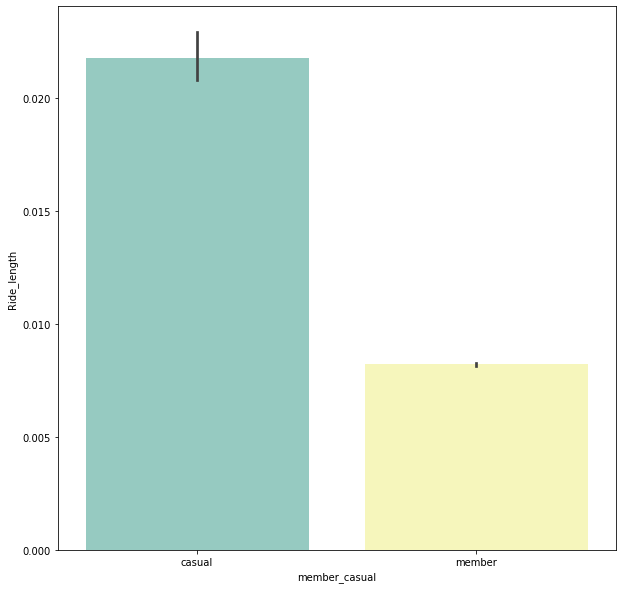

In [5]:
plt.figure(figsize = (10, 10))
sns.barplot(x = df["member_casual"], y = df["Ride_length"], palette = "Set3");

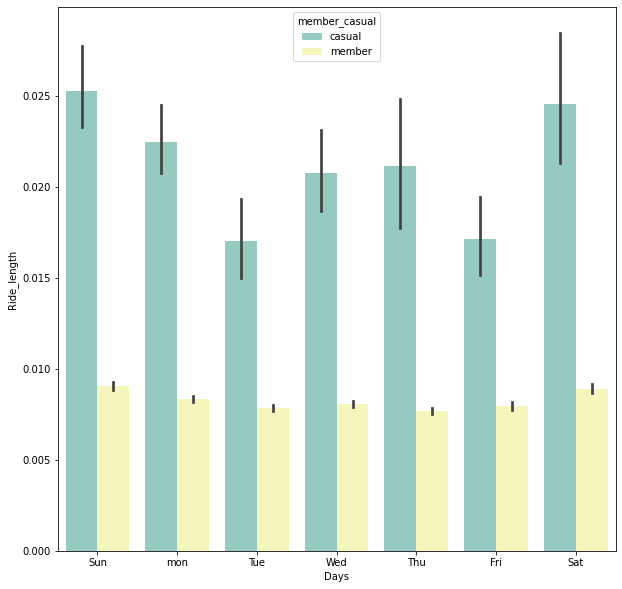

In [26]:
sorted_df=df.sort_values(by="weekdays")
plt.figure(figsize = (10, 10))
sns.barplot(x = sorted_df["Days"], y = sorted_df["Ride_length"],hue=sorted_df["member_casual"], palette = "Set3");

### Analysis:

It seems like casual user has longer ride compare to member.Its positive to know that casual_user has the more rides_length    ,this point can be consider while marketing and it will help the comapany to get more subscription. 

In weekly based we can see that casual member use most the rides during weekend. 

## <span style=color:orange>Barplot for bike type usage by member_casual.</span>


## Filtering data.

In [5]:
u=['electric_bike','classic_bike']
df1=df[df.rideable_type.isin(u)]
df1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_length,weekdays
0,C2F7DD78E82EC875,electric_bike,44574.49985,44574.50190,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0.002049,5
1,A6CF8980A652D272,electric_bike,44571.36245,44571.36547,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0.003021,2
2,BD0F91DFF741C66D,classic_bike,44586.20394,44586.20696,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0.003021,3
3,CBB80ED419105406,classic_bike,44565.01255,44565.02292,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0.010370,3
4,DDC963BFDDA51EEA,classic_bike,44581.06331,44581.06750,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0.004190,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503416,211BE0DC162D85B7,electric_bike,44615.74154,44615.75172,NaN,NaN,Leavitt St & Chicago Ave,18058,41.880000,-87.630000,41.895501,-87.682017,member,0.010185,4
503417,D4D53E78000C8CA1,electric_bike,44596.44707,44596.45199,NaN,NaN,Leavitt St & Chicago Ave,18058,41.910000,-87.680000,41.895501,-87.682017,member,0.004919,6
503418,9E85F07D2F94492B,electric_bike,44620.38649,44620.39457,Wood St & Chicago Ave,637,Canal St & Adams St,13011,41.895714,-87.672209,41.879255,-87.639904,member,0.008079,2
503419,B61B559F81F1D823,electric_bike,44602.70505,44602.70686,NaN,NaN,Canal St & Adams St,13011,41.880000,-87.630000,41.879255,-87.639904,member,0.001817,5


In [9]:
df1['Ride_values']=df1['rideable_type']
df1['Ride_values'].replace(['electric_bike','classic_bike','docked_bike'] ,[1,1,1],inplace=True)
df1.head()

<ipython-input-9-1453e47058eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Ride_values']=df1['rideable_type']
c:\python39\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_length,weekdays,Ride_values
0,C2F7DD78E82EC875,electric_bike,44574.49985,44574.50190,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0.002049,5,1
1,A6CF8980A652D272,electric_bike,44571.36245,44571.36547,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0.003021,2,1
2,BD0F91DFF741C66D,classic_bike,44586.20394,44586.20696,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0.003021,3,1
3,CBB80ED419105406,classic_bike,44565.01255,44565.02292,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0.010370,3,1
4,DDC963BFDDA51EEA,classic_bike,44581.06331,44581.06750,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0.004190,5,1


## Grouping data.

In [29]:
ty=df1[["rideable_type","member_casual","Ride_values"]].groupby(["rideable_type","member_casual"],as_index=False).sum("Ride_values")
ty.head()


,rideable_type,member_casual,Ride_values
0,classic_bike,casual,50468
1,classic_bike,member,198452
2,electric_bike,casual,68670
3,electric_bike,member,175151


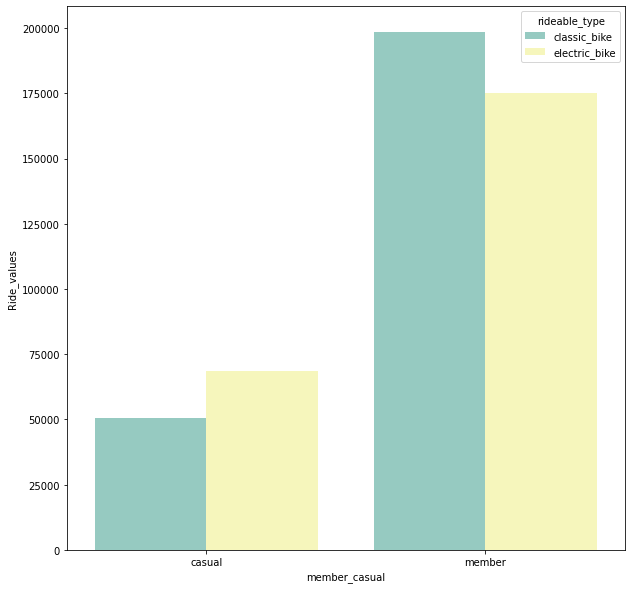

In [13]:
plt.figure(figsize = (10, 10))
sns.barplot(x = ty["member_casual"], y = ty["Ride_values"],hue =ty["rideable_type"], palette = "Set3");

## Analysis:

It looks like Member prefer both the bikes for rides,we can clearly look that Casual perfer electic bike for rides rather that classic_bike.    

## <span style=color:orange>Most popular city by casual user(using tableau)</span><span style=color:blue>[Link](https://public.tableau.com/app/profile/glen.rodrigues/viz/MostpopularcitysbyCasual_users/Sheet4)</span>

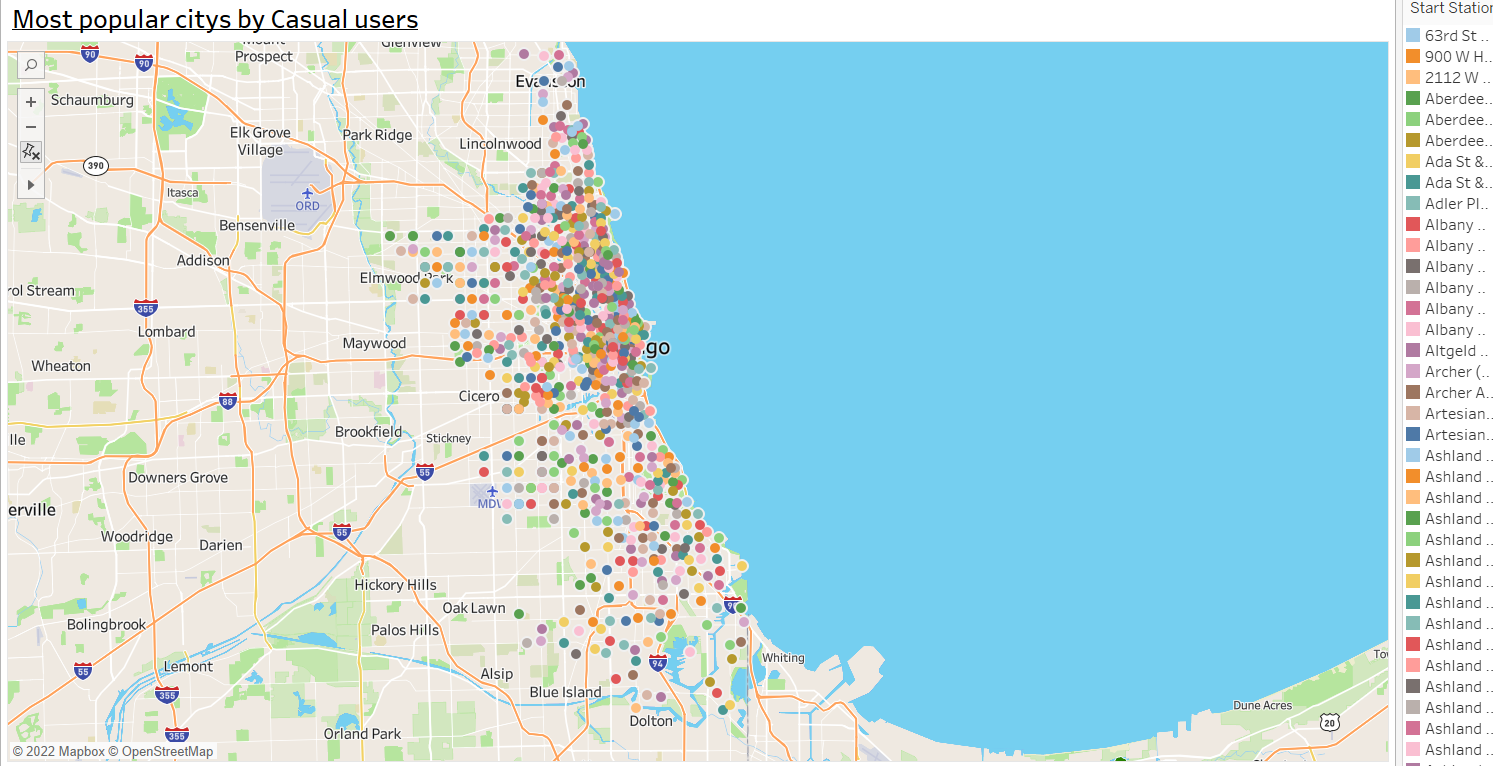

## <span style=color:orange>Most popular city by member user(using tableau)</span><span style=color:Blue>[Link](https://public.tableau.com/app/profile/glen.rodrigues/viz/MostpopularcitysbyMember_users/Sheet3)</span>

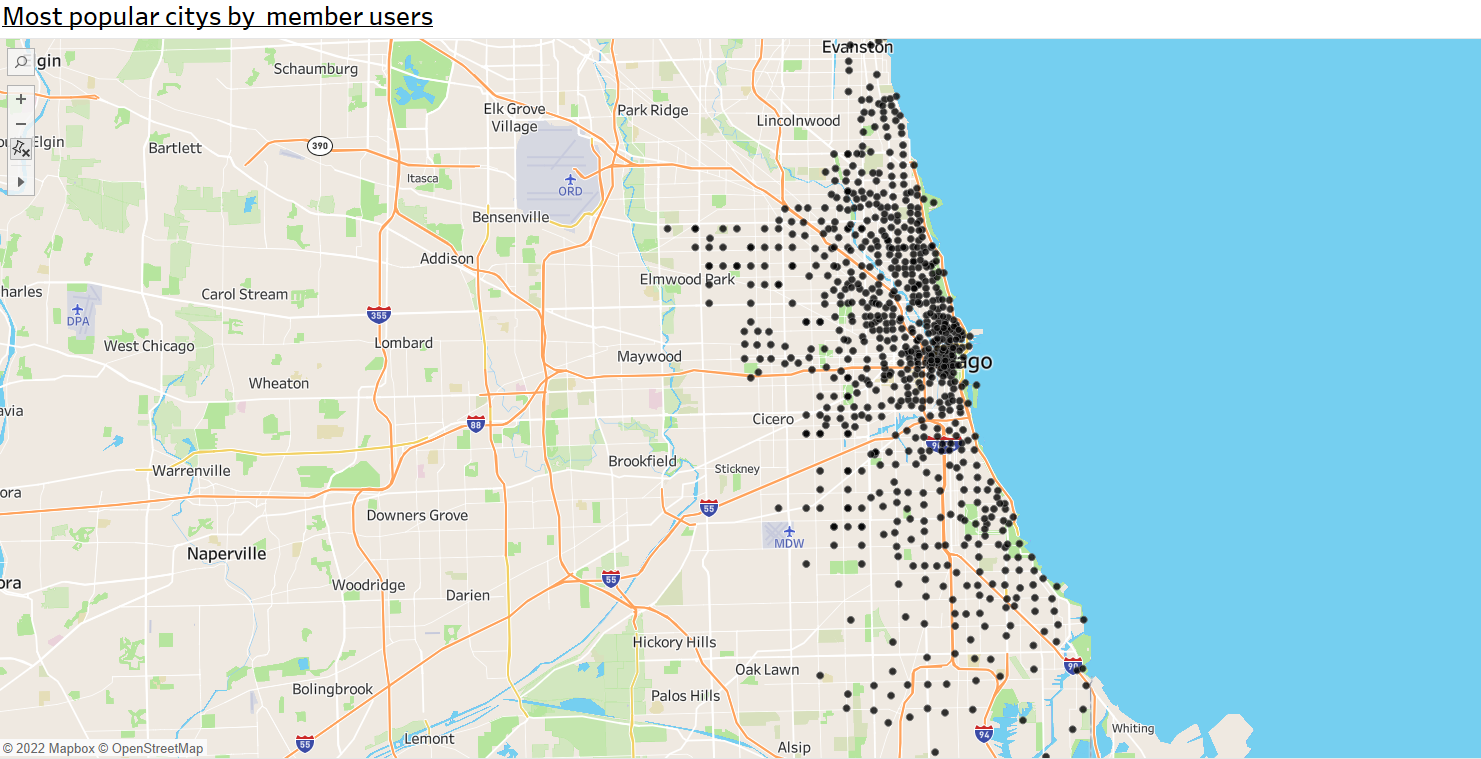

## Analysis:

1. There are some instresting points on the maps,this clearly tell us the story that data contains the user data which are in the Illinois state of America.
2. As we can see the most of the casual_riders have started and ended in the same city(Chicago),it will be great assist to marketing team to focus their marketing in the particular city to gain more members .

## <span style=color:orange> START_STATIONS WITH MOST OUT GOING RIDES.</span>

#### Filtering data to causal_user only.

In [9]:
u=['casual']#only causal_user data
df2=df[df.member_casual.isin(u)]

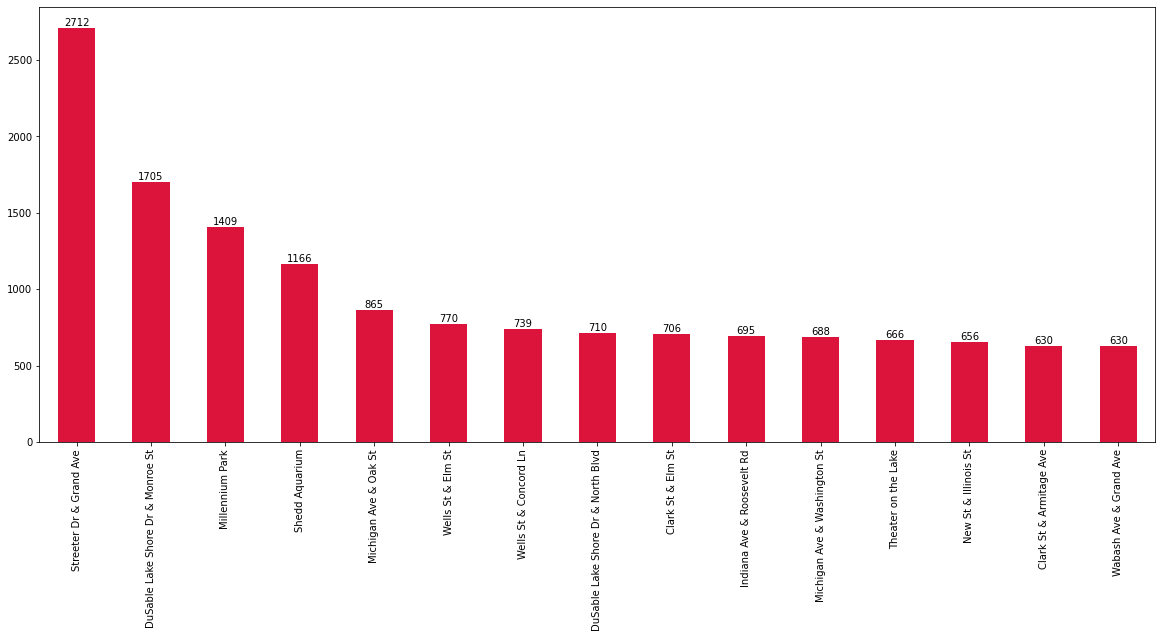

In [13]:
plt.figure(figsize = (20,8))
ax = df2["start_station_name"].value_counts()[:15].plot(kind = 'bar', color = "crimson")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

## <span style=color:orange> END_STATIONS WITH MOST IN COMING RIDES.</span>

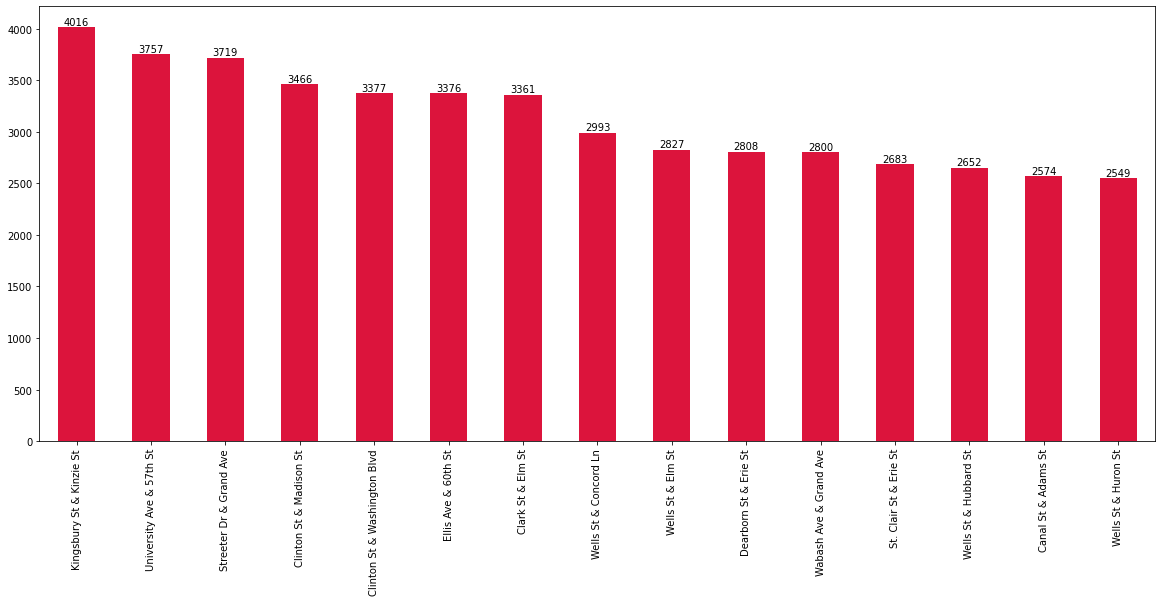

In [14]:
plt.figure(figsize = (20,8))
ax = df["end_station_name"].value_counts()[:15].plot(kind = 'bar', color = "crimson")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

## Analysis:

As we can see most of the casual_user start the ride from the "Streeter Dr & Grand Awe" most of them end their ride in the same town.So we can target such town for marketing purpose which will help to reach targeted(casual_user)audience and convert them to member.  

## <span style=Color:Orange>KEY POINTS:</span>

- Taking in consideration the business task: <span style=color:Red>What could motivate the “casual” users to change to an annual subscription based on their behavior?</span>

   1) The Casual users have long, and tourism rides mostly on weekends and using electric bikes.

   2) The Annual users have short rides, during all week using both electric & classic bikes.
  
   3) Promotion in Chicago will be a great strategy to attract more casual_users. 
  
   4) Special offers on weekend will attract more casual_customer.
  

#                                   THANK YOU FOR READING.